In [1]:
import sys
import os
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
from scipy import interpolate
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
from scipy import signal
import copy as cp
import pandas as pd

In [2]:
survey = "CORALIE" # survey name
sample_rate = 1 # sample rate of the data
min_wv = 5800 # minimum wavelength of the data
max_wv = 6000 # maximum wavelength of the data
spec_dir = r"C:\Users\kentb\Desktop\PDM\thesis\main\S1D\BGCru" # directory of the spectra
rv_dir = r"C:\Users\kentb\Desktop\PDM\thesis\main\S1D\RV\BG_Cru_coralie14_all.csv" # directory of the RVs

# LOAD DATA

obs_data = Observations(survey=survey, sample_rate=sample_rate, min_wv=min_wv, max_wv=max_wv,
                        target_visits_lib=spec_dir)
df = pd.read_csv(rv_dir)
rv = df.rv.astype(float).values
e_rv = df.rv_err.astype(float).values
times = df.bjd.astype(float).values
times = times - int(min(times))

# PERIODOGRAM PARAMETERS

baseline = int(obs_data.time_series.times[-1])
min_freq = 1/100 # Or maybe 1/2/baseline to be sure but let's test it that way.
max_freq = 1/2 # we don't expect more than one pulsation every two day so should be alright.
freq_range = (min_freq, max_freq) # frequency range of the periodograms
points_per_peak = 5
periodogram_grid_resolution = points_per_peak*max_freq*baseline # frequency resolution of the periodograms

# RESULS DIRECTORY

results_dir = r"C:\Users\kentb\Desktop\PDM\thesis\main\S1D" # directory of the results



# Preprocess the spectra

for i in obs_data.time_series.vals:
    i = i.SpecPreProccess()

# Rearrange the RVs with the spectra

obs_data.rearrange_time_series(rv=rv, times=times)

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\thesis\main\S1D\BGCru
Selected directory: C:\Users\kentb\Desktop\PDM\thesis\main\S1D\BGCru


In [3]:
print(len(obs_data.time_series.times),len(times),len(obs_data.time_series.calculated_vrad_list))

403 405 403


In [3]:
## Compute periodograms

# Choosing frequency range and frequency resolution for the periodograms.
obs_data.initialize_periodicity_detector(freq_range=freq_range,
                                        periodogram_grid_resolution=periodogram_grid_resolution)

obs_data.periodicity_detector.period_truth = [3.3425]

In [4]:
obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shape")
print("done calc shift_periodogram")

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shift")
print("done calc shape_periodogram")

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True,title=r"BG_Cru")
plt.show()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<function argsort at 0x0000025AB25A90D0>) found for signature:
 
 >>> argsort(array(float64, 2d, C), kind=Literal[str](quicksort))
 
There are 2 candidate implementations:
[1m      - Of which 1 did not match due to:
      Overload in function 'Numpy_method_redirection.generic': File: numba\core\typing\npydecl.py: Line 348.
        With argument(s): '(array(float64, 2d, C), kind=Literal[str](quicksort))':[0m
[1m       Rejected as the implementation raised a specific error:
         TypingError: [1m[1m- Resolution failure for literal arguments:
       [1mNone[0m
       [0m[1m- Resolution failure for non-literal arguments:
       [1mname 'errors' is not defined[0m
       [0m[0m[0m
  raised from c:\Users\kentb\miniconda3\envs\pdm\lib\site-packages\numba\core\types\functions.py:446
[1m      - Of which 1 did not match due to:
      Overload in function 'Numpy_method_redirection.generic': File: numba\core\typing\npydecl.py: Line 348.
        With argument(s): '(array(float64, 2d, C), kind=unicode_type)':[0m
[1m       Rejected as the implementation raised a specific error:
         TypingError: [1m[1m- Resolution failure for literal arguments:
       [1mname 'errors' is not defined[0m
       [0m[1m- Resolution failure for non-literal arguments:
       [1mNone[0m
       [0m[0m[0m
  raised from c:\Users\kentb\miniconda3\envs\pdm\lib\site-packages\numba\core\types\functions.py:446
[0m
[0m[1mDuring: resolving callee type: Function(<function argsort at 0x0000025AB25A90D0>)[0m
[0m[1mDuring: typing of call at c:\users\kentb\desktop\pdm\sparta\sparta\USURPER\USURPER_functions.py (130)
[0m
[1m
File "..\..\..\sparta\sparta\USURPER\USURPER_functions.py", line 130:[0m
[1mdef inner_prod(a: np.ndarray, b: np.ndarray) -> float:
    <source elided>
    temp = np.arange(1, n + 1)
[1m    Ix0 = np.argsort(a,kind='quicksort')
[0m    [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function inner_prod at 0x0000025AC68BB4C0>))[0m
[0m[1mDuring: typing of call at c:\users\kentb\desktop\pdm\sparta\sparta\USURPER\USURPER_functions.py (190)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function inner_prod at 0x0000025AC68BB4C0>))[0m
[0m[1mDuring: typing of call at c:\users\kentb\desktop\pdm\sparta\sparta\USURPER\USURPER_functions.py (190)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function inner_prod at 0x0000025AC68BB4C0>))[0m
[0m[1mDuring: typing of call at c:\users\kentb\desktop\pdm\sparta\sparta\USURPER\USURPER_functions.py (190)
[0m
[1m
File "..\..\..\sparta\sparta\USURPER\USURPER_functions.py", line 190:[0m
[1mdef norm_z(a, b):
    <source elided>
    '''
[1m    factor = inner_prod(a, b) / inner_prod(b, b)
[0m    [1m^[0m[0m


In [9]:
import numpy as np
import math

def dyad_update_c(Y, C):
    # Variable declaration
    n = len(Y)
    L = int(math.ceil(math.log(n) / math.log(2)))
    s_length = 2 ** (L + 1)
    s = np.zeros(s_length, dtype=np.float64)

    for ii in range(1, n):
        for ell in range(L):
            k = int(math.ceil(Y[ii - 1] / 2 ** ell))
            pos = k
            if ell > 0:
                for scale in range(ell - 1, -1, -1):
                    pos += 2 ** (L - scale)
            s[pos - 1] += C[ii - 1]

        for ell in range(L):
            k = int(math.floor((Y[ii] - 1) / 2 ** ell))
            if k / 2 > int(k / 2):
                pos = k
                if ell > 0:
                    for scale in range(ell - 1, -1, -1):
                        pos += 2 ** (L - scale)
                GAMMA[ii] += s[pos - 1]

    return GAMMA

# Example usage
Y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
C = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], dtype=np.float64)

result = dyad_update_c(Y, C)
print(result)



[0.  0.1 0.3 0.6 1.  1.5 2.1 2.8 3.6 4.5]


In [194]:
peaks_index = signal.find_peaks(obs_data.periodicity_detector.results_power["shape_periodogram"],height = 0.25)
for ind in peaks_index[0]:
    print(1/obs_data.periodicity_detector.results_frequency["shape_periodogram"][ind])

3.040534287972968
3.033316364346135
3.0293211949750143
3.026132628814571
3.0221563479737097
3.01977559128519
3.015025313103824
3.012655773951268
3.0079278515809924
3.0047841389203156
3.001646990653132
2.9969535315839804
2.9946123018673356
2.989940799172176
2.986834552741005
2.983734753764046
2.9798690412336137
2.976783675836023


In [174]:
def get_peaks(y):
    indices = signal.argrelextrema(y, np.greater)[0]
    y_peaks = y[indices]
    y_sorted = np.flip(np.sort(y_peaks))
    indices = indices[np.flip(np.argsort(y_peaks))]
    # y_sorted = np.flip(np.sort(y)[-number:])
    # indices = np.flip(np.argsort(y)[-number:])
    return y_sorted, indices

def check_for_other_signals(obs, name_estimator, max_m=4, max_n=2):
    x = obs.periodicity_detector.results_frequency[name_estimator]
    dx = x[1]-x[0]
    
    y = obs.periodicity_detector.results_power[name_estimator]
    peaks, idx_peaks = get_peaks(y)
    x_peaks = x[idx_peaks]
    
    
    main_peak, main_peak_freq = peaks[0], x_peaks[0]
    secondary_peaks, secondary_peaks_freq = peaks[1:], x_peaks[1:]
    
    check_peaks = []
    for m in np.arange(max_m+1)[2:]:
        F = main_peak_freq/m
        for i, f in enumerate(secondary_peaks_freq):
            if (F-dx <= f <= F+dx):
                check_peaks.append(('m', m, i, f, secondary_peaks[i]))
                
    for n in np.arange(max_n)[1:]:
        Fpos = main_peak_freq + n
        Fneg = main_peak_freq - n
        for i, f in enumerate(secondary_peaks_freq):
            if (Fpos-dx <= f <= Fpos+dx):
                check_peaks.append(('n+', n, i, f, secondary_peaks[i]))
            if (Fneg-dx <= f <= Fneg+dx):
                check_peaks.append(('n-', n, i, f, secondary_peaks[i]))     
    
    print(f'Main Peak:\n\tPower: {main_peak}\n\tFreq: {main_peak_freq}\n\tPeriod: {1./main_peak_freq}')
    if check_peaks != []:
        print(check_peaks)
    else:
        print("No problems found!")
        
    return main_peak, main_peak_freq, check_peaks, secondary_peaks, secondary_peaks_freq

In [195]:
peak, peak_freq, check_list, secon, secon_freq = check_for_other_signals(obs_data, "shape_periodogram", max_m=4, max_n=2)

Main Peak:
	Power: 0.6219146784350671
	Freq: 0.3324547826086957
	Period: 3.0079278515809924
[('m', 2, 41, 0.16619391304347828, 0.15909985470344237), ('m', 3, 159, 0.11080260869565219, 0.06595346014688219), ('m', 4, 361, 0.08306347826086957, 0.023251253037933704)]


In [68]:
for i in np.arange(10):
    print(secon[i], 1/secon_freq[i])

0.4971675657511035 3.0018010806483884
0.49107300527286835 3.0150753768844214
0.4579933678308804 3.0333670374115265
0.4381052597336217 2.9838870101452155
0.4255792742722986 3.0260238047205963
0.39928989024493716 3.01993154821824
0.388591439149387 2.9946097025354357
0.38388580585255944 2.9898345624875415
0.378942013721966 2.9970029970029963
0.3494239056979394 3.0223655047350384


In [73]:
from scipy.optimize import curve_fit

In [74]:
def gaussian(x, a, mu, sig):
    return a*np.exp(-np.power((x - mu)/sig, 2.)/2)

def fit_gaussian_to_peak(obs, name_estimator, frequency, peak, plot=True):
    x = obs.periodicity_detector.results_frequency[name_estimator]
    dx = x[1]-x[0]
    
    y = obs.periodicity_detector.results_power[name_estimator]
    minimums_index = signal.argrelextrema(y, np.less)[0]
    
    ranges = []
    jump = 0 
    get_back = 0
    for i, minima in enumerate(minimums_index):
        if x[minima] > frequency:
            if np.isclose(y[minima], peak, rtol=5e-2) and (jump==0):
                jump = 1
                continue
            if np.isclose(y[minimums_index[i-1-jump]], peak, rtol=5e-2) and (get_back==0):
                get_back = 1
            ranges = [minimums_index[i-1-jump-get_back], minima]
            break
            
    if ranges == []:
        print('***WARNING: peak is limited by the maximum frequency calculated')
        ranges = [minimums_index[-1], np.size(x)-1]
        
    if ranges[0]>ranges[1]:
        print('***WARNING: peak is limited by the minimum frequency calculated')
        ranges = [0, ranges[1]]
    
    x_val = x[np.arange(ranges[0], ranges[1]+1)]
    y_val = y[np.arange(ranges[0], ranges[1]+1)]
    offset = 0
    if min(y_val)<0:
        
        offset = np.abs(min(y_val))
        y_val = y_val + offset
    
    popt, pcov = curve_fit(gaussian, x_val, y_val, p0=[peak, frequency, np.ptp(x_val)/2.])
    popt_err = np.sqrt(np.diag(pcov))
    
    print(f'Frequency range fitted: [{min(x_val)}, {max(x_val)}] delta={np.ptp(x_val)}')
    print(f'Mean freq: {popt[1]} +/- {popt_err[1]}  HWHM: {np.sqrt(2*np.log(2))*popt_err[1]}')
    print(f'Period: {1./popt[1]} +/- {popt_err[1]/(popt[1]**2)}  HWHM: {(np.sqrt(2*np.log(2))*popt_err[1])/(popt[1]**2)}')
    
    if plot:
        plt_idx = np.arange(ranges[0]-20, ranges[1]+21)
        plt_idx = plt_idx[(plt_idx >= 0) & (plt_idx < np.size(x))]
        x_plt = x[plt_idx]
        y_plt = y[plt_idx]
        plt.plot(x_plt, y_plt, 'k+:', label='DATA')
        plt.plot(np.linspace(x_val[0], x_val[-1],num=1000), gaussian(np.linspace(x_val[0], x_val[-1],num=1000), *popt)-offset, 'r-', label='fit')
        plt.legend()
        plt.title(f'Fit: {name_estimator}')
        plt.xlabel(r' Freq ($day^-1$)')
        plt.ylabel('Power')
        plt.show()
    return popt, pcov

Frequency range fitted: [0.29896923076923076, 0.2994307692307692] delta=0.0004615384615384577
Mean freq: 0.29917022766509294 +/- 1.4241639936746975e-05  HWHM: 1.6768249598582538e-05
Period: 3.342578597491503 +/- 0.00015911944586625412  HWHM: 0.00018734883034003612


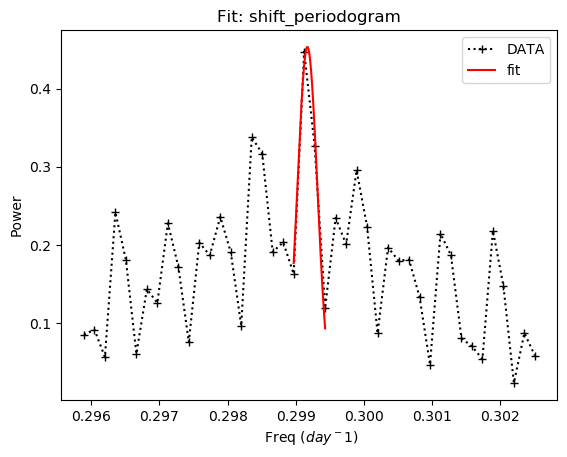

In [91]:
popt, pcov = fit_gaussian_to_peak(obs_data, "shift_periodogram", peak_freq, peak, plot=True)

todo:
 
use all data

try to fit fourier series with periods 3.34 and 3.0088 to the rvs. -> one explanation as to why we couldn't see a periodicity pattern in the residuals is maybe because when g.v. plots them, he subtracts his own model of how BG cru should pulsate(and it doesn't account for modulation).

In [248]:
obs_data_all = Observations(survey="CORALIE", sample_rate=1, min_snr=1, min_wv=5800, max_wv=6000)
for i in obs_data_all.time_series.vals:
     i = i.SpecPreProccess()

let's goooo
Selected directory: C:/Users/kentb/Desktop/PDM/thesis/main/S1D/BGCru
CORALIE.2015-05-12T030215.000_s1d_A.fits
CORALIE.2015-05-12T051252.000_s1d_A.fits
CORALIE.2015-05-13T031930.000_s1d_A.fits
CORALIE.2015-05-13T051438.000_s1d_A.fits
CORALIE.2015-05-14T030124.000_s1d_A.fits
CORALIE.2015-05-14T055208.000_s1d_A.fits
CORALIE.2015-05-16T033528.000_s1d_A.fits
CORALIE.2015-05-16T055533.000_s1d_A.fits
CORALIE.2015-05-17T033623.000_s1d_A.fits
CORALIE.2015-05-17T054811.000_s1d_A.fits
CORALIE.2015-05-18T023926.000_s1d_A.fits
CORALIE.2015-05-18T054737.000_s1d_A.fits
CORALIE.2015-05-20T024244.000_s1d_A.fits
CORALIE.2015-05-20T045903.000_s1d_A.fits
CORALIE.2015-05-22T024742.000_s1d_A.fits
CORALIE.2015-05-22T052016.000_s1d_A.fits
CORALIE.2015-05-23T025927.000_s1d_A.fits
CORALIE.2015-05-23T041218.000_s1d_A.fits
CORALIE.2016-03-29T070610.000_s1d_A.fits
CORALIE.2017-05-02T000617.000_s1d_A.fits
CORALIE.2017-05-03T055512.000_s1d_A.fits
CORALIE.2017-05-

In [249]:
df_all = pd.read_csv(r"C:\Users\kentb\Desktop\PDM\thesis\main\S1D\RV\BG_Cru_coralie14_all.csv")
rv_all = df_all.rv.astype(float).values
times_all = df_all.bjd.astype(float).values
times_all = times_all-int(min(times_all))
e_rv_all = df_all.rv_err.astype(float).values

In [250]:
print(len(obs_data_all.time_series.times))
print(len(times_all))

403
405


In [251]:
count = 0
ind_all = []
for index, t in enumerate(times_all):
    found = False
    for i in obs_data_all.time_series.times:
        if abs(i-t) < 1e-4:
            found = True
            count+=1
            break
    if not found:
            print(t)
            ind_all.append(index)
print(count)
print(ind_all) 

2872.7860289999953
2945.561796000002
403
[283, 385]


In [252]:
ok_index_all = [i for i, x in enumerate(times_all) if x <= max(obs_data_all.time_series.times)+1e-3]
print(ok_index_all)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [253]:
ok_index_all = [i for i in ok_index_all if i not in ind_all]
print(len(times_all))
print(len(obs_data_all.time_series.times))

405
403


In [254]:
times_all = [times_all[i] for i in ok_index_all]
rv_all = [rv_all[i] for i in ok_index_all]
e_rv_all = [e_rv_all[i] for i in ok_index_all]

In [256]:
obs_data_all.time_series.calculated_vrad_list = rv_all

In [257]:
print(len(obs_data_all.time_series.times))
print(len(obs_data_all.time_series.calculated_vrad_list))
print(len(rv_all))
print(len(times_all))

403
403
403
403


In [258]:
# Choosing frequency range and frequency resolution for the periodograms.
obs_data_all.initialize_periodicity_detector(freq_range=(1/5_0, 1/2), periodogram_grid_resolution=3500) 
obs_data_all.periodicity_detector.period_truth = [3.3425]

done calc_GLS
done calc_PDC
done calc_USURPER
done calc shift_periodogram
done calc shape_periodogram


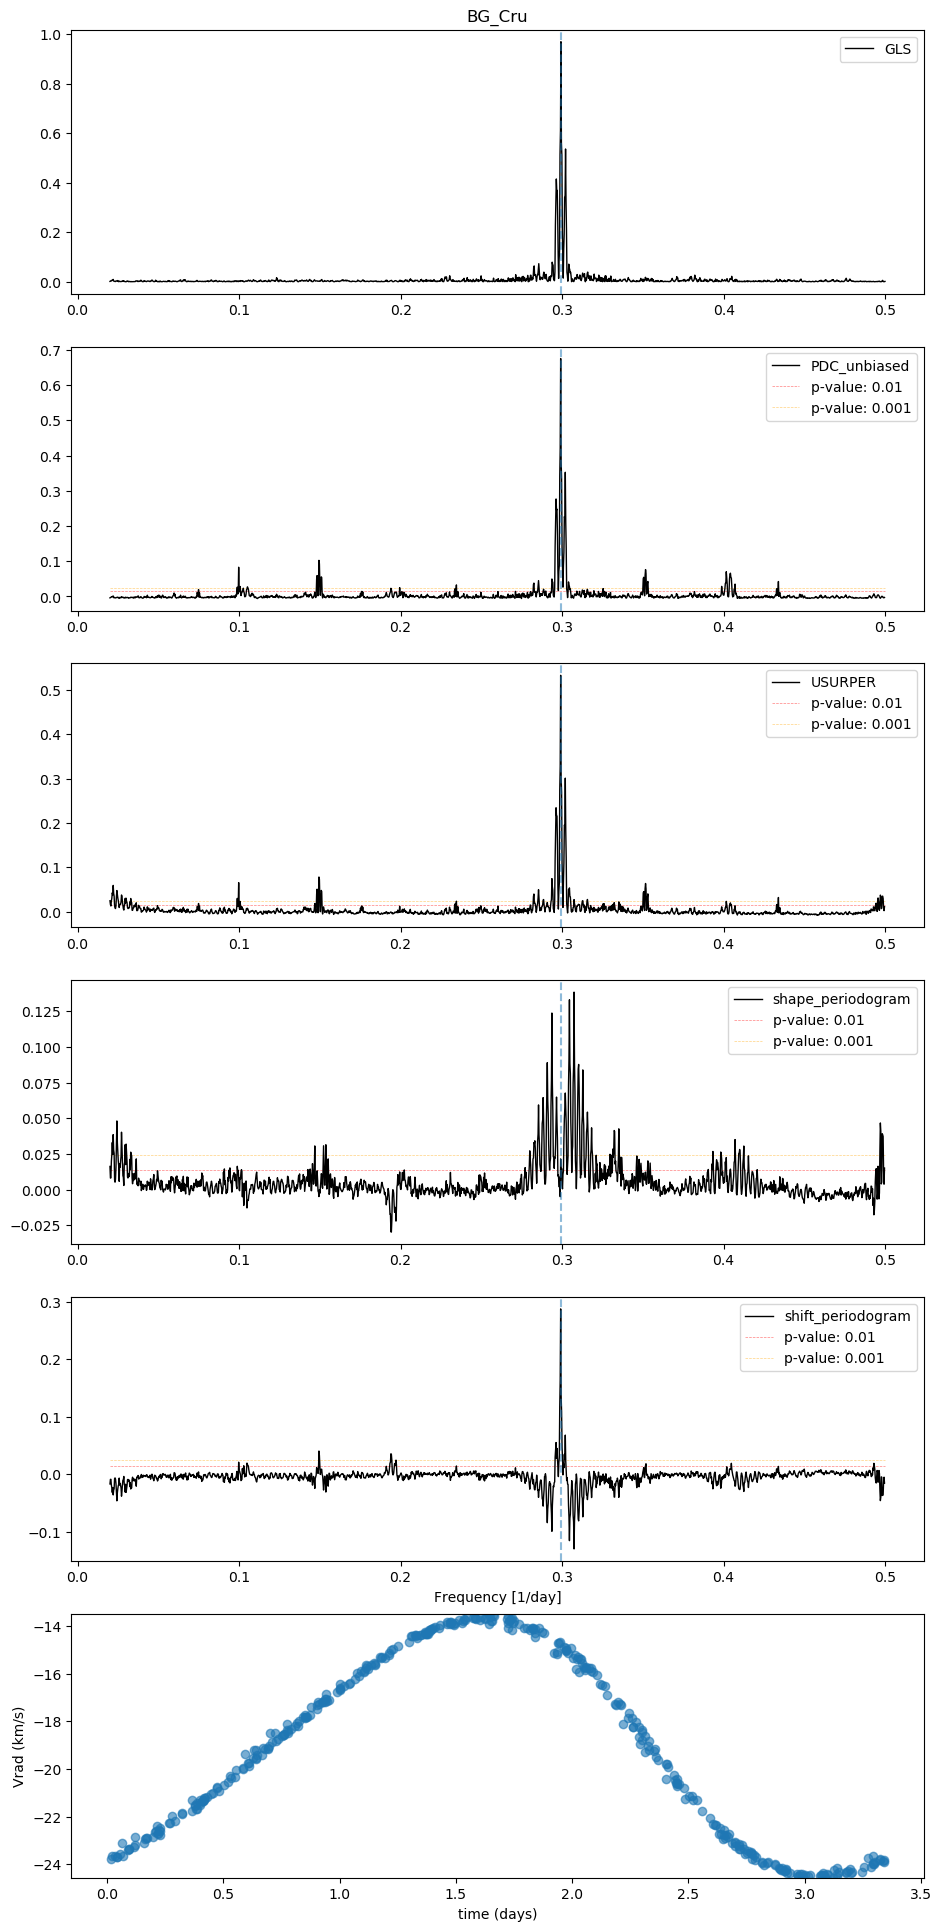

In [259]:
obs_data_all.periodicity_detector.calc_GLS()
print("done calc_GLS")

obs_data_all.periodicity_detector.calc_PDC(calc_biased_flag=False, calc_unbiased_flag=True)
print("done calc_PDC")

obs_data_all.periodicity_detector.calc_USURPER(calc_biased_flag=False, calc_unbiased_flag=True)
print("done calc_USURPER")



obs_data_all.periodicity_detector.calc_partial_periodogram(partial_type="shape")
print("done calc shift_periodogram")

obs_data_all.periodicity_detector.calc_partial_periodogram(partial_type="shift")
print("done calc shape_periodogram")

obs_data_all.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True,title=r"BG_Cru")
plt.show()